<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/datasets/financials.ipynb#scrollTo=e9928f14" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Análisis SP500

El índice, tal como se lo conoce hoy en día, fue formulado en 1957 al extenderse para incluir las 500 compañías más grandes de Estados Unidos. Este índice bursátil se compone de las 500 empresas más grandes de Estados Unidos y se pondera de acuerdo a la capitalización de mercado de cada una de las empresas.

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [11]:
f = pd.read_csv('financials.csv') 
f

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [5]:
!python --version
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn',sns.__version__)

Python 3.9.12
NumPy 1.21.5
Pandas 1.4.3
Matplotlib 3.5.2
Seaborn 0.11.2


## Observación

* Hay 505 empresas relacionadas
* De cada cada una de ellas hay medidos 14 atributos. 

## Descripción de cada uno de los atributos

In [2]:
f.columns 

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

* Symbol: es el sigla que identifica la empresa. (Categórica)
* Name: nombre de la empresa.(Categórica)
* Sector: Sector económico.(Categórica)
* Price: precio de la acción.(Numérica continua)
* Price/Earnings: precio/beneficio.(Numérica continua) 
* Dividend Yield: rentabilidad por dividendo.(Numérica continua) 
* Earning/Share: Ganancia por acción.(Numérica continua)
* 52 Week Low: Precio mínimo en 52 semanas. (Numérica continua)
* '52 Week High': Precio máximo en 52 semanas. (Numérica continua) 
* 'Market Cap': Tope de mercado. (Numérica continua)
* EBITDA: Ganancia de la empresa. (Numérica continua)
* Price/Sales: Relación Precio-venta(P/S). Es la cantidad de inversores dispuestos a pagar por cada dolar de venta (Numérica continua). 
* Price/Book: Precio en libros. (Numérica continua)
* SEC Filings: Dirección de la bolsa de valores. (Categórica)

|Variable|Descripción|Tipología|  
|--------|-----------|---------|  
|Simbol|||

In [5]:
f.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


* El precio en libros y el precio/ganancia son los únicos atributos que tienen datos faltantes.  

In [6]:
f['SEC Filings']

0      http://www.sec.gov/cgi-bin/browse-edgar?action...
1      http://www.sec.gov/cgi-bin/browse-edgar?action...
2      http://www.sec.gov/cgi-bin/browse-edgar?action...
3      http://www.sec.gov/cgi-bin/browse-edgar?action...
4      http://www.sec.gov/cgi-bin/browse-edgar?action...
                             ...                        
500    http://www.sec.gov/cgi-bin/browse-edgar?action...
501    http://www.sec.gov/cgi-bin/browse-edgar?action...
502    http://www.sec.gov/cgi-bin/browse-edgar?action...
503    http://www.sec.gov/cgi-bin/browse-edgar?action...
504    http://www.sec.gov/cgi-bin/browse-edgar?action...
Name: SEC Filings, Length: 505, dtype: object

# 3. Planteamiento de preguntas/problemas de negocio

Describa el problema que le interesa resolver durante su proyecto. Liste preguntas importantes que quiere resolver empleando el análisis de datos:

 

¿Cuáles son los atributos mejores predictores del precio de la acción?

# 4. Análisis exploratorio

Usar las visualizaciones y estadísticas descriptivas para resumir y entender el comportamiento y estructura de los datos, recuerde que no es solo mostrar los estadísticos y gráficas, debe haber un análisis sistemático de cada variable y las relaciones existentes usando los recursos vistos en clase.

 

Divida su análisis en dos partes. Análisis univariado – Análisis bivariado/multivariado.

Primero, escoja algunas variables que considere importantes dentro de su conjunto de datos, haga un análisis univariado y determine cuál es la distribución de esas variables. Recuerde que podemos observar la distribución tanto de variables cualitativas como cuantitativas. Identifique posibles valores atípicos o erróneos en cada variable. Describa la distribución observada.

Segundo, desarrolle un análisis bivariado dónde pueda encontrar posibles relaciones entre sus variables de estudio.

A continuación, se listan algunos recursos sugeridos, no debe organizar su informe en base a esta lista, tan solo es una sugerencia para que los tenga presente:

* Medidas de tendencia central
* Medidas de dispersión
* Histogramas
* Diagramas de barras
* Boxplots
* Diagramas de dispersión – pair plots
* Análisis de correlación

In [8]:
f.describe(include = 'all')  

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
count,505,505,505,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000,505
unique,505,505,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,505
top,MMM,3M Company,Consumer Discretionary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
freq,1,1,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,NaN,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179,NaN
std,NaN,NaN,NaN,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508,NaN
min,NaN,NaN,NaN,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000,NaN
25%,NaN,NaN,NaN,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000,NaN
50%,NaN,NaN,NaN,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000,NaN
75%,NaN,NaN,NaN,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000,NaN


## Interpretación de las medidas de tendencia central 

* El atributo `Price` se mueve en un rango de $[2.82, 1806.06]$. 
* Se evidencia una gran variabilidad en cada atributo. 

# Trazado de matriz de histogramas

In [9]:
f.keys()

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

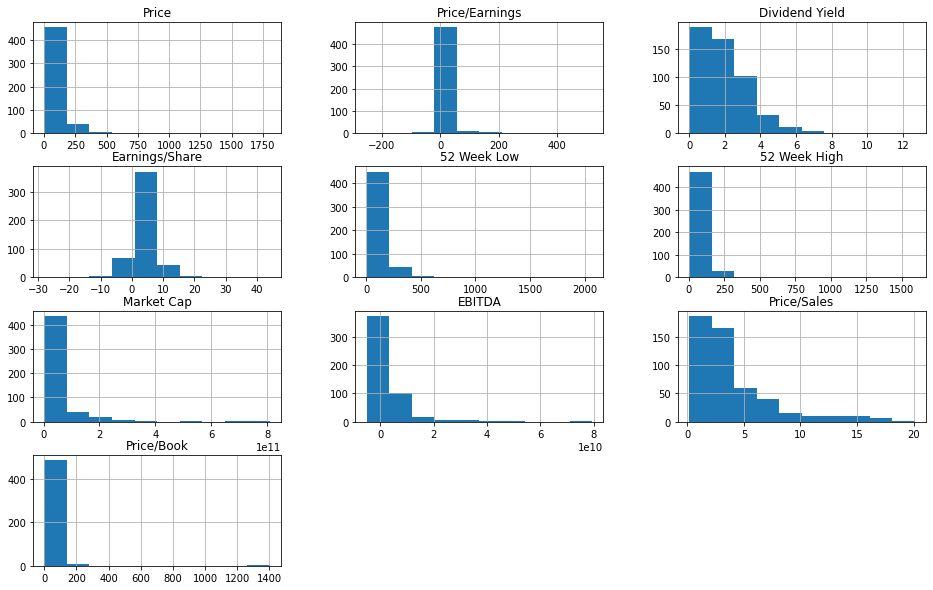

In [18]:
import matplotlib.pyplot as plt
f.hist(figsize = (16,10)) 
plt.show() 

# Interpretaciones de cada histograma asociado a cada variable numérica continua

* Para casi todas las empresas el valor de la acción es menor a 250 dólares. 
* El precio/ganancia más frecuente esta muy cercano a cero. 

# Boxplot

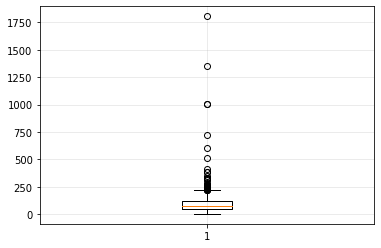

In [26]:
plt.boxplot(f.Price)
plt.grid(alpha = 0.3) 
plt.show() 


Interpretación del boxplot de 
* Los precio de las acciones se mueven en un rango de 0 a 250 dólares
* Hay más de 8 valores de precio de ación que son átipicos y estos valores atípicos con precios de acción mayor a 250 dólares. 


In [27]:
f.keys()

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [31]:
f['Price/Earnings']

0      24.31
1      27.76
2      22.51
3      19.41
4      25.47
       ...  
500    30.94
501    27.25
502    14.32
503    17.73
504    32.80
Name: Price/Earnings, Length: 505, dtype: float64

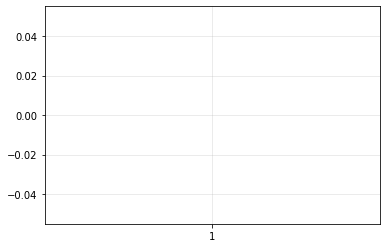

In [33]:
plt.boxplot(f['Price/Earnings'])
plt.grid(alpha = 0.3) 
plt.show() 

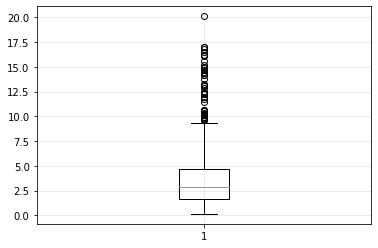

In [29]:
plt.boxplot(f['Price/Sales'])
plt.grid(alpha = 0.3) 
plt.show() 

# Comparación entre precio y precio-venta

In [38]:
f.keys()

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

In [60]:
f.corr().Price.sort_values(ascending = False)

Price             1.000000
52 Week Low       0.995076
52 Week High      0.982787
Earnings/Share    0.591061
Market Cap        0.406474
Price/Earnings    0.194761
Price/Sales       0.181625
EBITDA            0.180321
Price/Book        0.023637
Dividend Yield   -0.244630
Name: Price, dtype: float64

<AxesSubplot:>

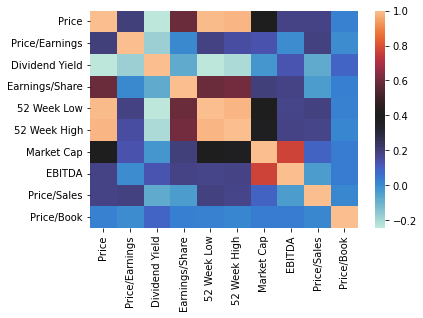

In [58]:
sns.heatmap(f.corr(), center = 0.4,annot = False)   

# Inferencias e interpretaciones del mapa de calor asociado a la matriz de correlaciones

* No hay correlaciones negativas 
* Pero hay dos atributos muy correlacionados positivamente con la variable objetivo del precio de acción. Los dos tributos más correlacionados positivamente con el precio son el precio más bajo y el precio más alto de la acción en el último año. 

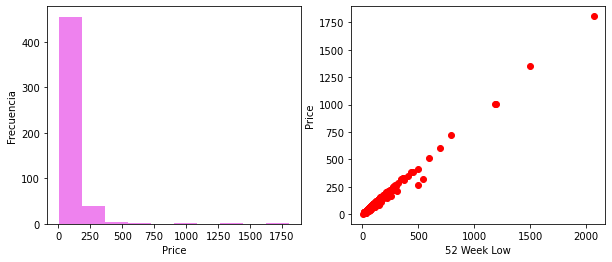

In [45]:
fig, axes = plt.subplots (1,2, figsize = (10,4)) # Aumentamos el tamaño del lienzo

# Grafica 1, histograma. Todo se agrega sobre axes[0]

axes[0].hist(f['Price'],  # datos
             bins = 10,             # cantidad de barras
             color = 'violet');     # color
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')


# Grafica 2, diagrama de dispersión. Todo se agrega sobre axes[1]

axes[1].scatter( f['52 Week Low'], f['Price'], 
             marker = 'o',            # se puede modificar el marcador
             color = 'red'); # grafico de dispersion
axes[1].set_xlabel('52 Week Low')
axes[1].set_ylabel('Price')
plt.show() 

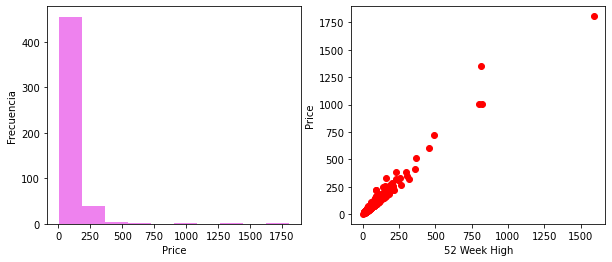

In [59]:
fig, axes = plt.subplots (1,2, figsize = (10,4)) # Aumentamos el tamaño del lienzo

# Grafica 1, histograma. Todo se agrega sobre axes[0]

axes[0].hist(f['Price'],  # datos
             bins = 10,             # cantidad de barras
             color = 'violet');     # color
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frecuencia')


# Grafica 2, diagrama de dispersión. Todo se agrega sobre axes[1]

axes[1].scatter( f['52 Week High'], f['Price'], 
             marker = 'o',            # se puede modificar el marcador
             color = 'red'); # grafico de dispersion
axes[1].set_xlabel('52 Week High')
axes[1].set_ylabel('Price')
plt.show() 

* Los precios las frecuentes son menores a 400 dólares 
* La relación entre precio y el precio más bajo en el último año es directamente proporcional, pues la correlación entre estas dos variables es muy muy cercana a 1. 

# 5. Conclusiones

* Las variables más correlacionadas con el precio de la acción son el precio más bajo y el precio más alto en el último año. 

## Recomendaciones: 

* Para predecir mejor el precio por acción es suficiente el precio más bajo por acción en el último año, pues los atributos de precio más bajo y precio más alto estan muy correlacionados entre sí. 

## Referentes

* Documentación de la función `heatmap` de seaborn: https://seaborn.pydata.org/generated/seaborn.heatmap.html